## Question 1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

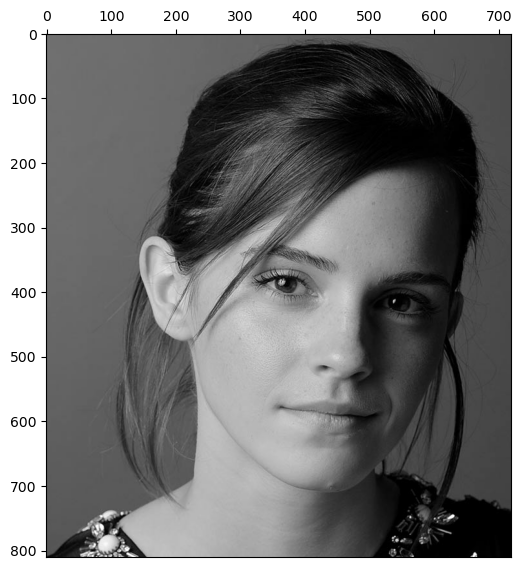

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('Assigment_1\\a1images\\a1images\\emma.jpg',cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()



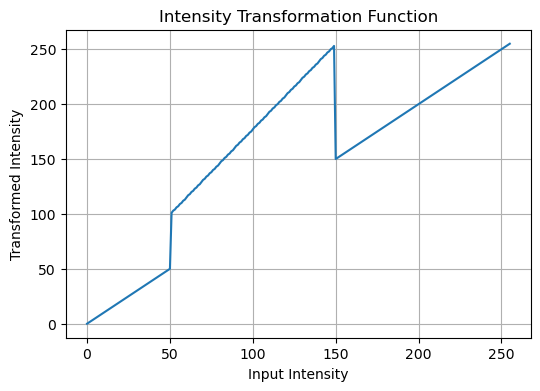

In [4]:
def intensity_transformation(im):
    mask= (im > 50) & (im < 150)
    trasformed_image = im.copy()
    trasformed_image[mask] = (255-100)/(150-50) * im[mask] + (100-(255-100)/100 * 50)
    return trasformed_image

x = np.arange(0, 256)
y = intensity_transformation(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

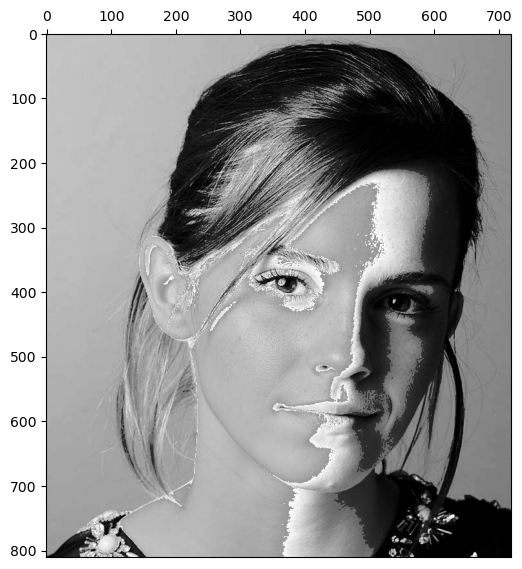

In [5]:
traformed_image =intensity_transformation(im)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

## Question 2

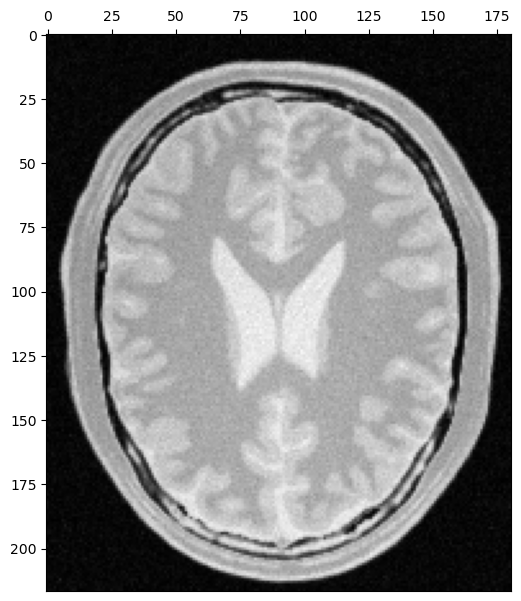

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('Assigment_1\\a1images\\a1images\\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

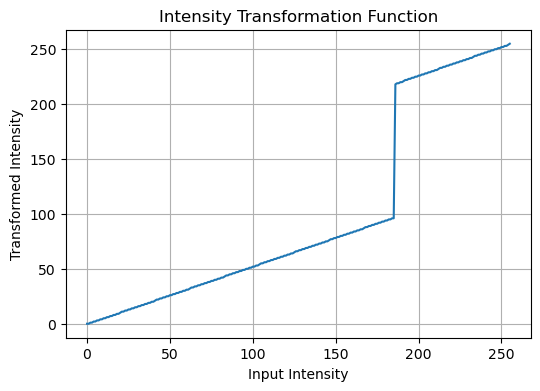

In [7]:
def gray_white_identify(im):
    mask= (im > 185) 
    trasformed_image = im.copy()

    m=(255-200)/(255-150)
    trasformed_image[mask] =m* im[mask] + (255-m*255)
    trasformed_image[~mask] =m* im[~mask]  # Set all other pixels to 0
    return trasformed_image

x = np.arange(0, 256)
y =  gray_white_identify(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

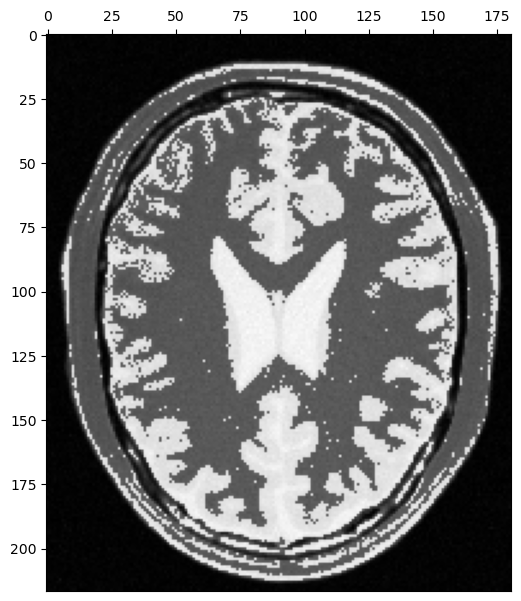

In [8]:
traformed_image = gray_white_identify(im)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

## Question 3

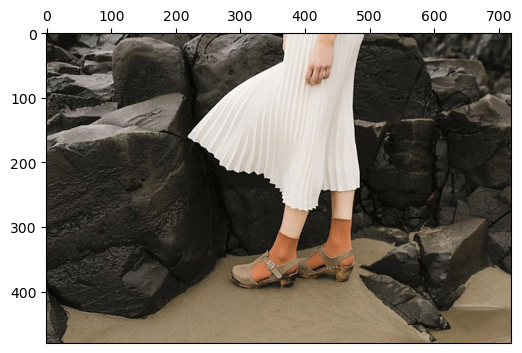

In [60]:
# Load the image
im= cv.imread('Assigment_1\\a1images\\a1images\\highlights_and_shadows.jpg')
l,a,b= cv.split(cv.cvtColor(im, cv.COLOR_BGR2LAB))

gamma = 0.75

t= ((np.arange(0, 256)/255)**gamma*255).astype(np.uint8)
l_transformed = cv.LUT(l, t)

traformed_image = cv.cvtColor(cv.merge((l_transformed, a, b)),cv.COLOR_Lab2BGR)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()


Histogram

In [37]:
def gamma_correction(l, gamma=1):
    t= ((np.arange(0, 256)/255)**gamma*255).astype(np.uint8)
    l_transformed = cv.LUT(l, t)
    return l_transformed



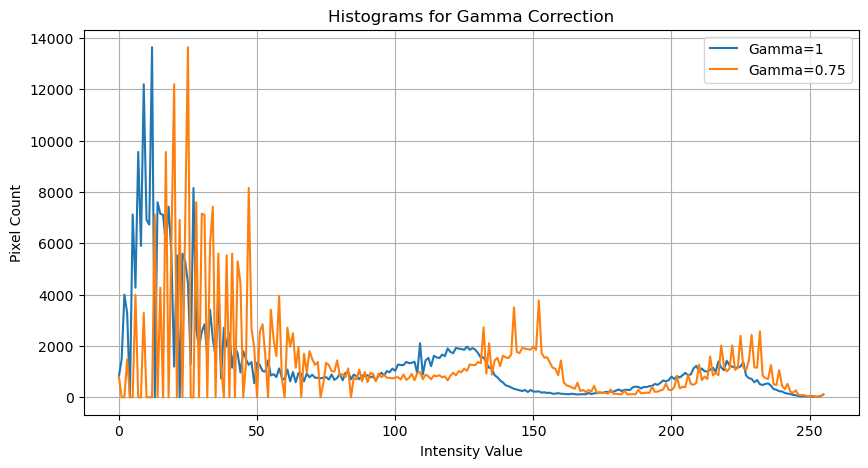

In [54]:
histrograms= [[np.sum(gamma_correction(l, gamma) == i) for i in range(256)] for gamma in [1,0.75]]
plt.figure(figsize=(10, 5))
for idx, gamma in enumerate([1, 0.75]):
    plt.plot(range(256), histrograms[idx], label=f'Gamma={gamma}')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.title('Histograms for Gamma Correction')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

In [64]:
im= cv.imread('Assigment_1\\a1images\\a1images\\spider.png')

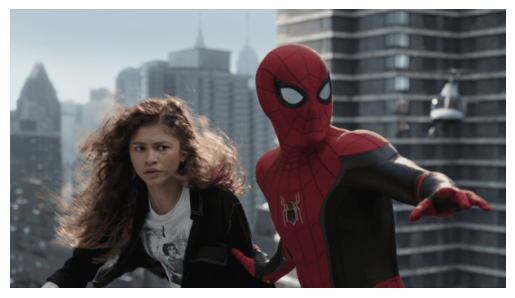

In [66]:
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

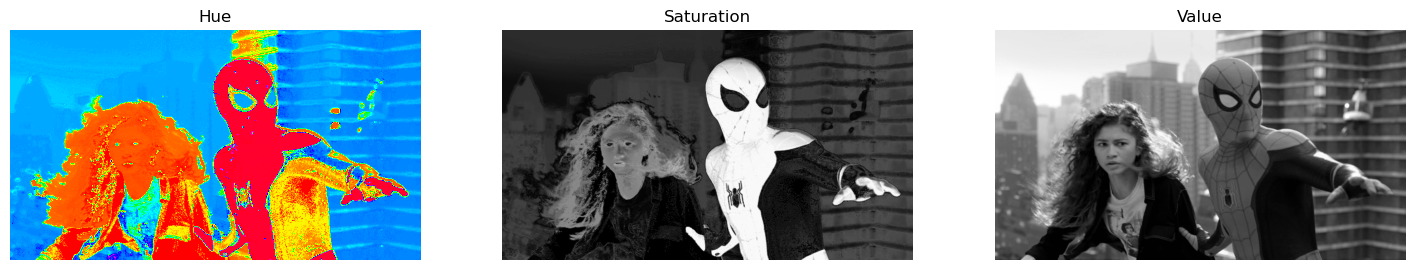

In [ ]:
#1. Convert the image to HSV color space and split into H, S, V planes
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h, s, v = cv.split(im_hsv)

# Display the H, S, V planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(h, cmap='hsv')
axes[0].set_title('Hue')
axes[1].imshow(s, cmap='gray')
axes[1].set_title('Saturation')
axes[2].imshow(v, cmap='gray')
axes[2].set_title('Value')
for ax in axes:
    ax.axis('off')
plt.show()

In [103]:
t= lambda x,a=1,sigma=70 : np.minimum(x + a*128*np.exp(-(x-128)**2/(2*sigma**2)), 255).astype(np.uint8)


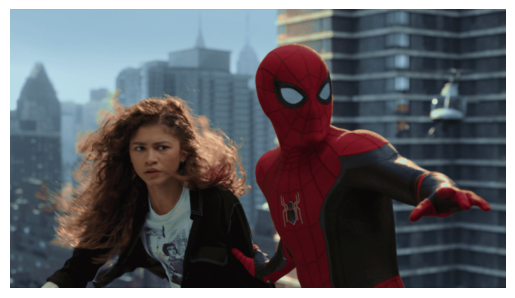

In [106]:
new_s=t(s,a=0.3)
t_im=cv.merge((h,new_s,v))
t_im=cv.cvtColor(t_im,cv.COLOR_HSV2RGB)

plt.imshow(t_im)
plt.axis('off')
plt.show()

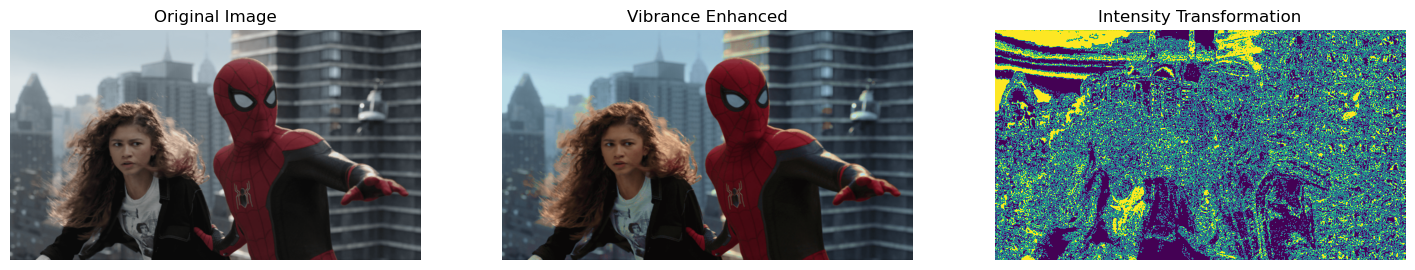

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Vibrance-enhanced image
axes[1].imshow(t_im)
axes[1].set_title('Vibrance Enhanced')
axes[1].axis('off')

# Intensity transformation
axes[2].imshow(new_s-s)
axes[2].set_title('Intensity Transformation')
axes[2].axis('off')

plt.show()